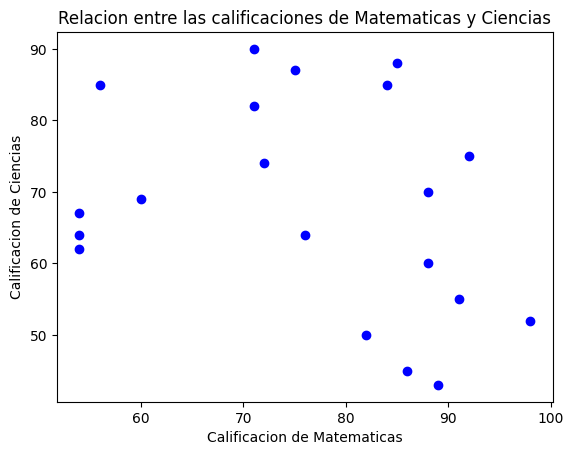

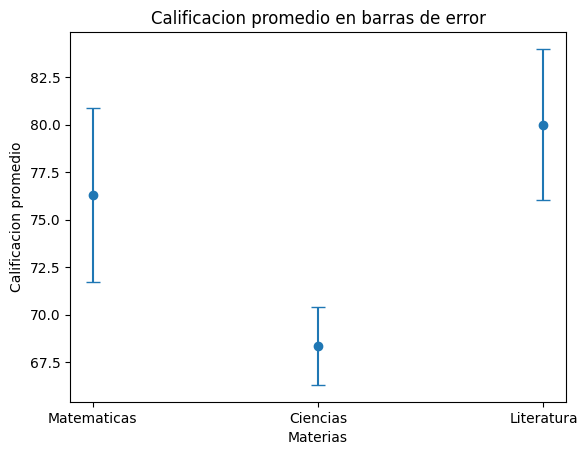

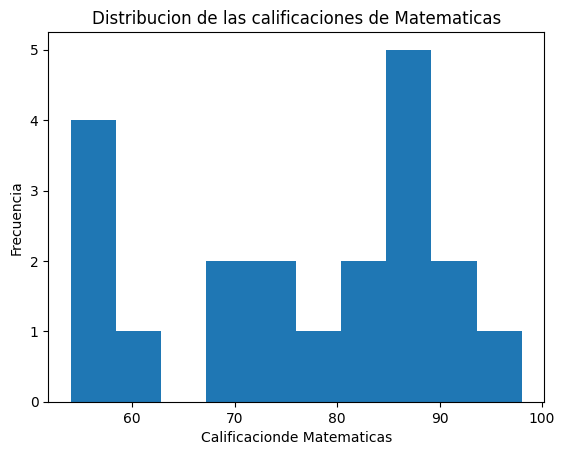

In [53]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# Datos de calificaciones de los estudiantes
matematicas = rng.integers(50, 100, 20)
ciencias = rng.integers(40, 95, 20)
literatura = rng.integers(60, 100, 20)

# Datos de errores para el gráfico de barras de error
errores_matematicas = rng.uniform(2, 5, 2)
errores_matematicas = [min(errores_matematicas), max(errores_matematicas)]

errores_ciencias = rng.uniform(1, 4, 2)
errores_ciencias = [min(errores_ciencias), max(errores_ciencias)]

errores_literatura = rng.uniform(3, 6, 2)
errores_literatura = [min(errores_literatura), max(errores_literatura)]


# Grafica de dispersion entre las calificaciones de matematicas y ciencias

plt.scatter(matematicas, ciencias, color='blue')
plt.title('Relacion entre las calificaciones de Matematicas y Ciencias')
plt.xlabel('Calificacion de Matematicas')
plt.ylabel('Calificacion de Ciencias')

plt.show()

# Gráfico de barras de error:

materias = ('Matematicas', 'Ciencias', 'Literatura')
promedios = (np.mean(matematicas), np.mean(ciencias), np.mean(literatura))
errores = (np.mean(errores_matematicas), np.mean(errores_ciencias), np.mean(errores_literatura))

plt.errorbar(materias, promedios, yerr=errores, fmt='o',capsize=5)
plt.title('Calificacion promedio en barras de error')
plt.xlabel('Materias')
plt.ylabel('Calificacion promedio')

plt.show()

# Grafica de Histograma de matematicas

bin = round(np.mean(np.sqrt(matematicas)),0)
bin2 = 1+ np.log2(len(matematicas))
# aunque al calcular el bins con la raiz cuadrada de la materia nos da 9 con 10 nos da la grafica solicitada
plt.hist(matematicas, bins=10)
plt.title('Distribucion de las calificaciones de Matematicas')
plt.xlabel('Calificacionde Matematicas')
plt.ylabel('Frecuencia')

plt.show()

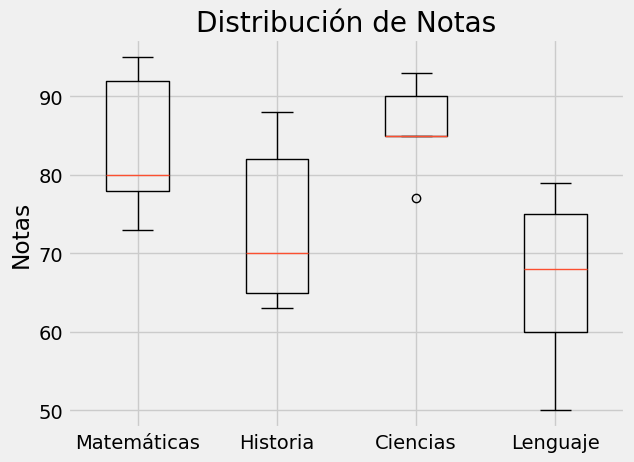

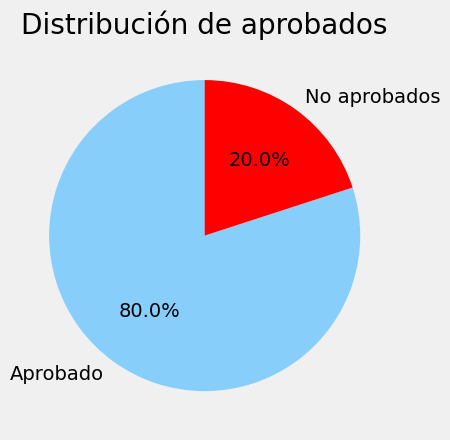

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

datos = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
           11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "materia": ["Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje"],
    "nota": [80, 65, 90, 75,
             95, 70, 85, 60,
             78, 82, 93, 68,
             73, 88, 77, 50,
             92, 63, 85, 79],
    "aprobado": ["Sí", "No", "Sí", "Sí",
                 "Sí", "Sí", "Sí", "No",
                 "Sí", "Sí", "Sí", "Sí",
                 "Sí", "Sí", "Sí", "No",
                 "Sí", "No", "Sí", "Sí"]
}

datos = pd.DataFrame(datos)
datos = datos.set_index('id')
nota_Matemáticas = (datos[datos['materia']== 'Matemáticas']['nota']).values
nota_Historia = (datos[datos['materia']=="Historia"]["nota"]).values
nota_Ciencias = (datos[datos['materia']=="Ciencias"]["nota"]).values
nota_Lenguaje = (datos[datos['materia']=="Lenguaje"]["nota"]).values

# Grafica de cola de raton donde dividimos por notas de cada materia
plt.boxplot([nota_Matemáticas,nota_Historia,nota_Ciencias,nota_Lenguaje])
plt.style.use('fivethirtyeight')
plt.title("Distribución de Notas")
plt.xticks([1, 2, 3, 4], ['Matemáticas', 'Historia', 'Ciencias','Lenguaje'])
plt.ylabel("Notas")
plt.show()


# Grafica de torta de alumnos aprobados 
alumnos_apro = len((datos[datos['aprobado']=="Sí"]["aprobado"]).values)
alumnos_rep = len((datos[datos['aprobado']=="No"]["aprobado"]).values)

categorias = ['Aprobado', 'No aprobados']
valores = [((alumnos_apro*100)/(alumnos_apro+alumnos_rep)),((alumnos_rep*100)/(alumnos_apro+alumnos_rep))]
startangle = 90
colors = ['lightskyblue', 'red']
plt.pie(valores, labels= categorias, colors=colors,startangle=startangle, autopct='%1.1f%%')
plt.title("Distribución de aprobados")
plt.show()

In [244]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

datos = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
           11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "materia": ["Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje",
                "Matemáticas", "Historia", "Ciencias", "Lenguaje"],
    "nota": [80, 65, 90, 75,
             95, 70, 85, 60,
             78, 82, 93, 68,
             73, 88, 77, 50,
             92, 63, 85, 79],
    "aprobado": ["Sí", "No", "Sí", "Sí",
                 "Sí", "Sí", "Sí", "No",
                 "Sí", "Sí", "Sí", "Sí",
                 "Sí", "Sí", "Sí", "No",
                 "Sí", "No", "Sí", "Sí"]
}

datos = pd.DataFrame(datos)
datos = datos.set_index('id')
nota_Matemáticas = (datos[datos['materia']== 'Matemáticas']['nota']).values
nota_Historia = (datos[datos['materia']=="Historia"]["nota"]).values
nota_Ciencias = (datos[datos['materia']=="Ciencias"]["nota"]).values
nota_Lenguaje = (datos[datos['materia']=="Lenguaje"]["nota"]).values


# CREAMOS EL GRAFICO DE CAJA PARA LAS NOTAS POR MATERIA

fig = go.Figure()  # Crear una figura vacía

# Añadir el trazado de cajas a la figura  de cada Materia
fig.add_trace(go.Box(
    y=nota_Matemáticas, # Datos para el gráfico de cajas
    name='Matemáticas',  # Etiqueta del gráfico de cajas
    jitter=0.3,  # Controlar la dispersión horizontal de los puntos
    whiskerwidth=0.2, # Controlar el ancho de las cajas
    fillcolor='lightgray' # Color de relleno de las cajas
))  
fig.add_trace(go.Box(
    y=nota_Historia, # Datos para el gráfico de cajas
    name='Historia',  # Etiqueta del gráfico de cajas
    jitter=0.3,  # Controlar la dispersión horizontal de los puntos
    whiskerwidth=0.2, # Controlar el ancho de las cajas
    fillcolor='lightgray' # Color de relleno de las cajas
    
))  

fig.add_trace(go.Box(
    y=nota_Ciencias, # Datos para el gráfico de cajas
    name='Ciencias',  # Etiqueta del gráfico de cajas
    jitter=0.3,  # Controlar la dispersión horizontal de los puntos
    whiskerwidth=0.2, # Controlar el ancho de las cajas
    fillcolor='lightgray' # Color de relleno de las cajas
))  

fig.add_trace(go.Box(
    y=nota_Lenguaje, # Datos para el gráfico de cajas
    name='Lenguaje',  # Etiqueta del gráfico de cajas
    jitter=0.3,  # Controlar la dispersión horizontal de los puntos
    whiskerwidth=0.2, # Controlar el ancho de las cajas
    fillcolor='lightgray' # Color de relleno de las cajas
)) 

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Distribucion de Notas por Materia',  # Título del gráfico
    yaxis_title='Notas'  # Etiqueta del eje y
)

# Mostrar el gráfico
fig.show()


# CREAMOS LA GRAFICA  DE PAI DE APROBADS
alumnos_apro = len((datos[datos['aprobado']=="Sí"]["aprobado"]).values)
alumnos_rep = len((datos[datos['aprobado']=="No"]["aprobado"]).values)

labels = ['Aprobado', 'No aprobados']  # Etiquetas de las categorías
values = [((alumnos_apro*100)/(alumnos_apro+alumnos_rep)),((alumnos_rep*100)/(alumnos_apro+alumnos_rep))] # Valores correspondientes a los alumnos aprodos y no aprobados en %

fig = go.Figure()  # Crear una figura vacía

# Añadir el trazado de torta a la figura
fig.add_trace(go.Pie(
    labels=labels, values=values,  # Etiquetas y valores
    # hole=0.4  # Tamaño del hueco en el centro del gráfico de torta
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Cantidad de aprobados y no aprobados en %'  # Título del gráfico
)

# Mostrar el gráfico
fig.show()